In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import pandas as pd
import copy
from scipy import stats
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("/home/memari/centering_majid/tables/calls_cleaned.csv",parse_dates=['date'])

In [3]:
# find the first day
def find_first_day(device_id, df):
    df_target = df[df['device_id']==device_id]
    return min(df_target['date'])
def halve(df):
    first_day = {device_id:find_first_day(device_id, df) 
                 for device_id in set(df['device_id'].tolist())
                if find_first_day(device_id, df)>=datetime.date(year=2022,month=11,day=11)}
    df = df[df['device_id'].isin(first_day)]
    df['day'] = df.apply(lambda x: 1+(x['date']-first_day[x['device_id']]).days, axis = 1)
    df_1_14 = df[df['day']<=14]
    df_15_28 = df[(df['day']>14) & (df['day']<=28)]
    return df_1_14,df_15_28
df_1_14,df_15_28 = halve(df)

In [4]:
df_plot_1_14 = copy.deepcopy(df_1_14)
#df_plot = df_plot.merge(df_group[['device_id','Group']], on = 'device_id', how = 'left')
df_plot_1_14 = df_plot_1_14[['day','device_id','incoming_time','outgoing_time','missing_time','incoming_freq','outgoing_freq','missing_freq']]
df_plot_1_14

,day,device_id,incoming_time,outgoing_time,missing_time,incoming_freq,outgoing_freq,missing_freq
0,1,00e17b8a-4b0f-4230-bd26-3df2853e8916,625.0,24.0,0.0,3,2,0
1,2,00e17b8a-4b0f-4230-bd26-3df2853e8916,1876.0,1830.0,1176.0,7,14,2
2,3,00e17b8a-4b0f-4230-bd26-3df2853e8916,5157.0,803.0,0.0,10,3,0
3,4,00e17b8a-4b0f-4230-bd26-3df2853e8916,1403.0,335.0,954.0,4,16,2
4,5,00e17b8a-4b0f-4230-bd26-3df2853e8916,4783.0,996.0,0.0,6,4,0
...,...,...,...,...,...,...,...,...
2534,10,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,0.0,1465.0,265.0,0,7,1
2535,11,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,0.0,80.0,0.0,0,1,0
2536,12,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,1613.0,81.0,0.0,6,2,0
2537,13,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,1382.0,510.0,3.0,8,7,1


In [5]:
df_plot_15_28 = copy.deepcopy(df_15_28)
df_plot_15_28 = df_plot_15_28[['day','device_id','incoming_time','outgoing_time','missing_time','incoming_freq','outgoing_freq','missing_freq']]
df_plot_15_28

,day,device_id,incoming_time,outgoing_time,missing_time,incoming_freq,outgoing_freq,missing_freq
14,15,00e17b8a-4b0f-4230-bd26-3df2853e8916,1561.0,1074.0,0.0,4,2,0
15,16,00e17b8a-4b0f-4230-bd26-3df2853e8916,45.0,0.0,4.0,1,0,1
16,17,00e17b8a-4b0f-4230-bd26-3df2853e8916,1930.0,890.0,0.0,4,3,0
17,18,00e17b8a-4b0f-4230-bd26-3df2853e8916,1274.0,0.0,0.0,6,0,0
18,19,00e17b8a-4b0f-4230-bd26-3df2853e8916,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...
2544,20,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,29.0,1285.0,0.0,1,5,0
2545,21,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,0.0,1795.0,0.0,0,3,0
2546,22,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,0.0,911.0,0.0,0,6,0
2547,23,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,13.0,330.0,0.0,1,3,0


In [6]:
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv',
                       skiprows=[1, 2])[['Study ID', 'Group']]
df_group.columns = ['survey_id', 'group']
df_id = pd.read_csv('/home/memari/centering_majid/tables/id.csv')
df_group = df_id.merge(df_group, on='survey_id', how='left')
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)

df_plot_1_14 = df_plot_1_14.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')
df_plot_15_28 = df_plot_15_28.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')


In [7]:
df_plot_1_14 

,day,device_id,incoming_time,outgoing_time,missing_time,incoming_freq,outgoing_freq,missing_freq,group
0,1,00e17b8a-4b0f-4230-bd26-3df2853e8916,625.0,24.0,0.0,3,2,0,Experimental Condition
1,2,00e17b8a-4b0f-4230-bd26-3df2853e8916,1876.0,1830.0,1176.0,7,14,2,Experimental Condition
2,3,00e17b8a-4b0f-4230-bd26-3df2853e8916,5157.0,803.0,0.0,10,3,0,Experimental Condition
3,4,00e17b8a-4b0f-4230-bd26-3df2853e8916,1403.0,335.0,954.0,4,16,2,Experimental Condition
4,5,00e17b8a-4b0f-4230-bd26-3df2853e8916,4783.0,996.0,0.0,6,4,0,Experimental Condition
...,...,...,...,...,...,...,...,...,...
876,10,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,0.0,1465.0,265.0,0,7,1,Experimental Condition
877,11,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,0.0,80.0,0.0,0,1,0,Experimental Condition
878,12,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,1613.0,81.0,0.0,6,2,0,Experimental Condition
879,13,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,1382.0,510.0,3.0,8,7,1,Experimental Condition


In [8]:
df_plot_15_28

,day,device_id,incoming_time,outgoing_time,missing_time,incoming_freq,outgoing_freq,missing_freq,group
0,15,00e17b8a-4b0f-4230-bd26-3df2853e8916,1561.0,1074.0,0.0,4,2,0,Experimental Condition
1,16,00e17b8a-4b0f-4230-bd26-3df2853e8916,45.0,0.0,4.0,1,0,1,Experimental Condition
2,17,00e17b8a-4b0f-4230-bd26-3df2853e8916,1930.0,890.0,0.0,4,3,0,Experimental Condition
3,18,00e17b8a-4b0f-4230-bd26-3df2853e8916,1274.0,0.0,0.0,6,0,0,Experimental Condition
4,19,00e17b8a-4b0f-4230-bd26-3df2853e8916,0.0,0.0,0.0,0,0,0,Experimental Condition
...,...,...,...,...,...,...,...,...,...
709,20,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,29.0,1285.0,0.0,1,5,0,Experimental Condition
710,21,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,0.0,1795.0,0.0,0,3,0,Experimental Condition
711,22,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,0.0,911.0,0.0,0,6,0,Experimental Condition
712,23,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,13.0,330.0,0.0,1,3,0,Experimental Condition


In [9]:
df_plot_1_14  = df_plot_1_14[['day', 'group', 'incoming_time', 'outgoing_time',
                   'missing_time', 'incoming_freq', 'outgoing_freq', 'missing_freq']]
grouped_1_14 = df_plot_1_14 .groupby(['group'])
df_dict = {group: data for group, data in grouped_1_14}
active_control_1_14 = df_dict['Active Control']
experimental_condition_1_14 = df_dict['Experimental Condition']
passive_control_1_14 = df_dict['Passive Control']

In [10]:
df_plot_15_28  = df_plot_15_28[['day', 'group', 'incoming_time', 'outgoing_time',
                   'missing_time', 'incoming_freq', 'outgoing_freq', 'missing_freq']]
grouped_15_28 = df_plot_15_28 .groupby(['group'])
df_dict = {group: data for group, data in grouped_15_28}
active_control_15_28 = df_dict['Active Control']
experimental_condition_15_28 = df_dict['Experimental Condition']
passive_control_15_28 = df_dict['Passive Control']

In [11]:
mylist = ['incoming_time', 'outgoing_time', 'missing_time',
          'incoming_freq', 'outgoing_freq', 'missing_freq']

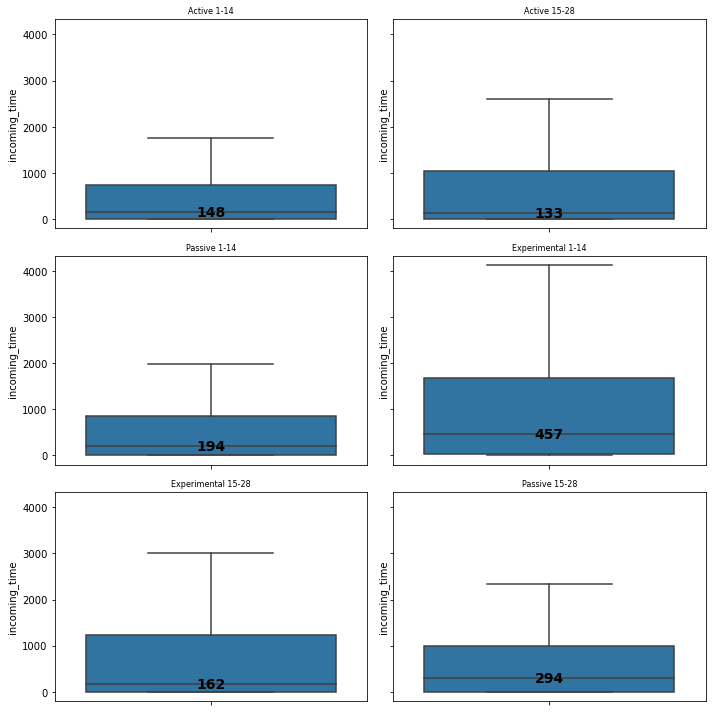

          Group  t-statistic   p-value
 Active Control    -0.817515  0.414612
                  Group  t-statistic   p-value
         Active Control    -0.817515  0.414612
 Experimental Condition     1.060724  0.290101
                  Group  t-statistic   p-value
         Active Control    -0.817515  0.414612
 Experimental Condition     1.060724  0.290101
        Passive Control    -1.460065  0.145849


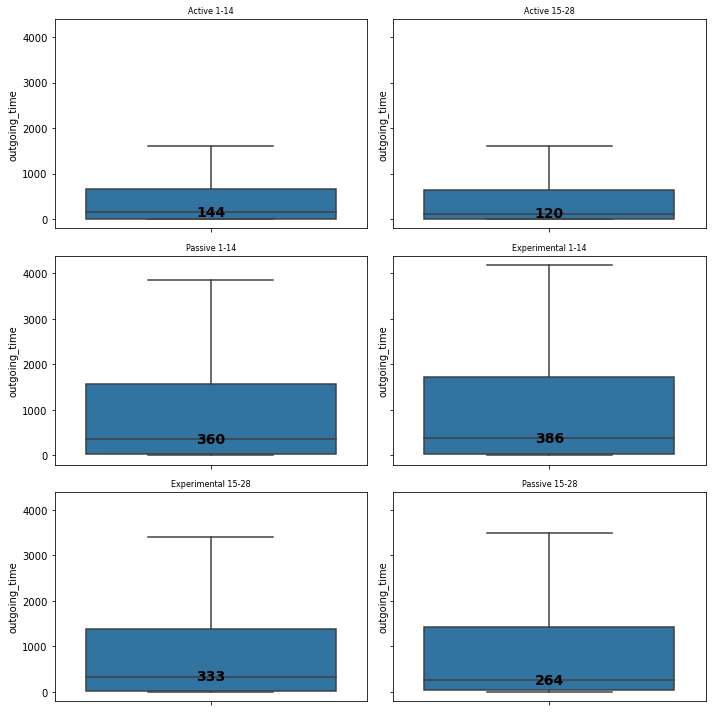

          Group  t-statistic   p-value
 Active Control     0.825298  0.410191
                  Group  t-statistic   p-value
         Active Control     0.825298  0.410191
 Experimental Condition     2.149421  0.032808
                  Group  t-statistic   p-value
         Active Control     0.825298  0.410191
 Experimental Condition     2.149421  0.032808
        Passive Control     0.345406  0.730154


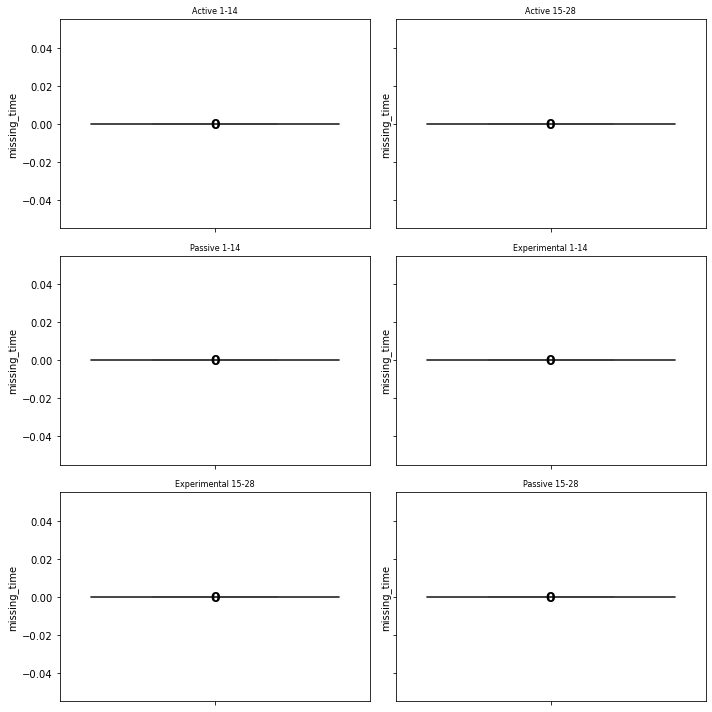

          Group  t-statistic   p-value
 Active Control     2.381201  0.018199
                  Group  t-statistic   p-value
         Active Control     2.381201  0.018199
 Experimental Condition    -0.779412  0.436663
                  Group  t-statistic   p-value
         Active Control     2.381201  0.018199
 Experimental Condition    -0.779412  0.436663
        Passive Control     0.326770  0.744185


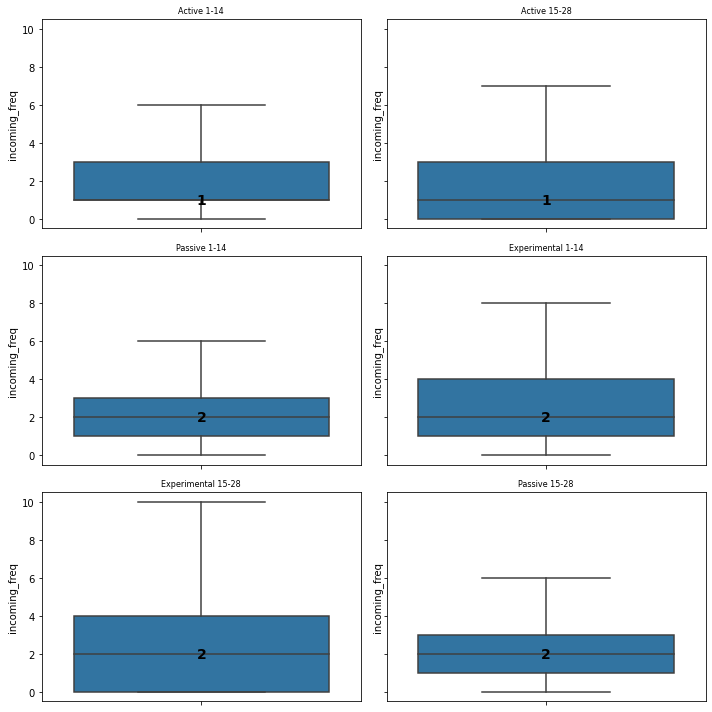

          Group  t-statistic   p-value
 Active Control    -0.028928  0.976951
                  Group  t-statistic   p-value
         Active Control    -0.028928  0.976951
 Experimental Condition     3.190468  0.001651
                  Group  t-statistic   p-value
         Active Control    -0.028928  0.976951
 Experimental Condition     3.190468  0.001651
        Passive Control    -0.555650  0.579075


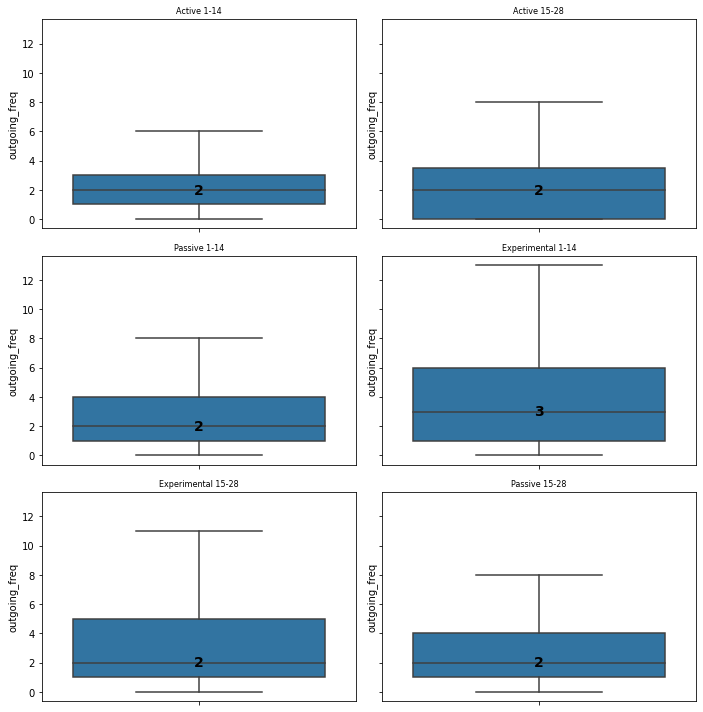

          Group  t-statistic   p-value
 Active Control     0.612098  0.541172
                  Group  t-statistic   p-value
         Active Control     0.612098  0.541172
 Experimental Condition     3.493496  0.000587
                  Group  t-statistic   p-value
         Active Control     0.612098  0.541172
 Experimental Condition     3.493496  0.000587
        Passive Control     0.388059  0.698387


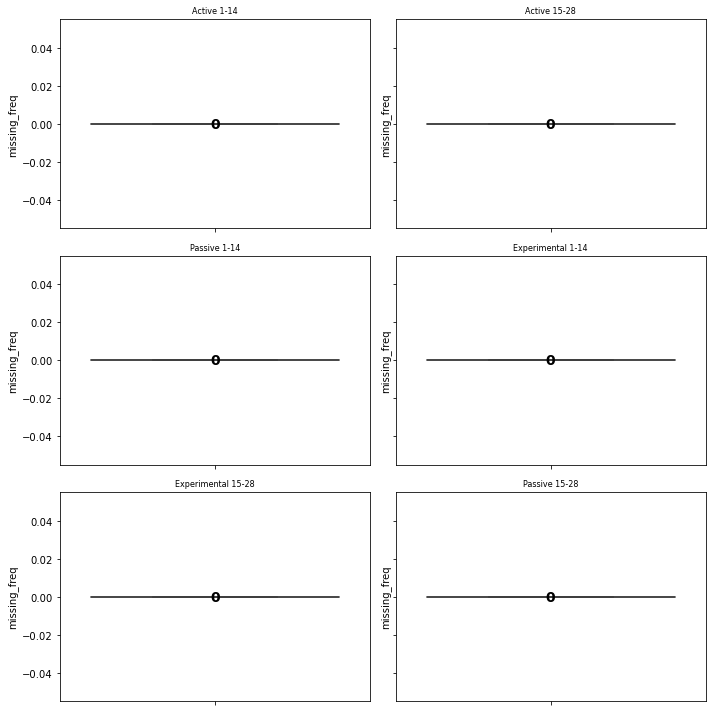

          Group  t-statistic  p-value
 Active Control          0.0      1.0
                  Group  t-statistic   p-value
         Active Control     0.000000  1.000000
 Experimental Condition     1.197943  0.232364
                  Group  t-statistic   p-value
         Active Control     0.000000  1.000000
 Experimental Condition     1.197943  0.232364
        Passive Control     0.777007  0.438077


In [14]:
for clm in mylist:
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10), sharey=True)

    sns.boxplot(y=active_control_1_14[clm], orient="v", showfliers=False, ax=ax1)
    sns.boxplot(y=active_control_15_28[clm], orient="v", showfliers=False, ax=ax2)
    sns.boxplot(y=experimental_condition_1_14[clm], orient="v", showfliers=False, ax=ax4)
    sns.boxplot(y=experimental_condition_15_28[clm], orient="v", showfliers=False, ax=ax5)
    sns.boxplot(y=passive_control_1_14[clm], orient="v", showfliers=False, ax=ax3)
    sns.boxplot(y=passive_control_15_28[clm], orient="v", showfliers=False, ax=ax6)

    ax1.set_title("Active 1-14", fontsize=8)
    m1 = int(active_control_1_14[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax2.set_title("Active 15-28", fontsize=8)
    m2 = int(active_control_15_28[clm].median())
    ax2.text(0, m2, m2, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax4.set_title("Experimental 1-14", fontsize=8)
    m3 = int(experimental_condition_1_14[clm].median())
    ax4.text(0, m3, m3, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax5.set_title("Experimental 15-28", fontsize=8)
    m4 = int(experimental_condition_15_28[clm].median())
    ax5.text(0, m4, m4, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax3.set_title("Passive 1-14", fontsize=8)
    m5 = int(passive_control_1_14[clm].median())
    ax3.text(0, m5, m5, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax6.set_title("Passive 15-28", fontsize=8)
    m6 = int(passive_control_15_28[clm].median())
    ax6.text(0, m6, m6, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})

    plt.tight_layout()
    plt.show()


    t, p = stats.ttest_rel(active_control_1_14[clm].iloc[:200], active_control_15_28[clm].iloc[:200])
    print('paired t-test for active_control before vs after intervention: t-statistic={:.2f} and p-value={:.2f}'.format(t, p))
    stat, p = stats.ttest_rel(experimental_condition_1_14[clm].iloc[:200], experimental_condition_15_28[clm].iloc[:200])
    print('paired t-test for experimental_condition before vs after intervention: t-statistic={:.2f} and p-value={:.2f}'.format(t, p))
    stat, p = stats.ttest_rel(passive_control_1_14[clm].iloc[:200], passive_control_15_28[clm].iloc[:200])
    print('paired t-test for passive_control before vs after intervention: t-statistic={:.2f} and p-value={:.2f}'.format(t, p))
